In [6]:
#!pip install pydotplus

In [448]:
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve


# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

### Preprocessing

In [449]:
# Load data
file_path = Path("loans_norm.csv")
loans_df = pd.read_csv(file_path)
loans_df.tail()

,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
495,1000,30,28,1,12,0,1,0,0,0,1
496,1000,15,26,1,7,0,1,0,0,0,1
497,800,15,30,1,6,0,0,0,1,0,1
498,1000,30,38,1,3,0,0,0,1,1,0
499,1000,30,28,1,3,0,1,0,0,0,1


In [450]:
# Define features set
X = loans_df.copy()
X.drop("bad", axis=1, inplace=True)
X.head()

,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [451]:
# Define target vector
y = loans_df["bad"].values.reshape(-1, 1)
y[:5]

array([[0],
       [0],
       [0],
       [0],
       [0]])

In [452]:
import numpy as np
sum(np.where(y == 1))

array([300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312,
       313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325,
       326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338,
       339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351,
       352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364,
       365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377,
       378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390,
       391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403,
       404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416,
       417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429,
       430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442,
       443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455,
       456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468,
       469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 48

## Naive model

In [453]:
naive_model = GradientBoostingClassifier().fit(X, y.ravel())
print("Prediction accuracy is {0:.5f}".format(accuracy_score(y.ravel(), naive_model.predict(X))))

Prediction accuracy is 0.74200


In [454]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=78)

# Creating StandardScaler instance
scaler = StandardScaler()

# Fitting Standard Scaler, i.e. remove the mean and scaling to unit variance
X_scaler = scaler.fit(X_train)

# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Choose best learning rate

In [455]:
# Iterate over learning rate to identify the best classifier learning rate
learning_rates = [0.03, 0.06, 0.07, 0.1, 0.25, 0.5, 0.75, 1]


### Create Gradient Boosting Classifier

In [456]:
#Represent Precision and Recall graphically
def plot_precision_recall(precisions, recalls, thresholds):

    plt.plot(thresholds, precisions[: -1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[: -1], 'g-', label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='center left')
    plt.ylim([0,1])
    plt.show()
    

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Negatove Rate')

For learning rate of 0.030000
Training accuracy is 0.581
Testing accuracy is 0.664
Prediction accuracy is 0.66400


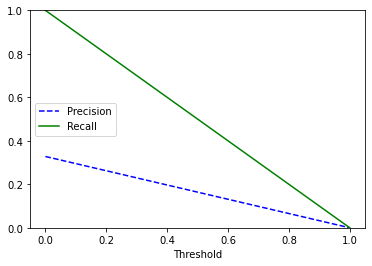


For learning rate of 0.060000
Training accuracy is 0.629
Testing accuracy is 0.632
Prediction accuracy is 0.63200


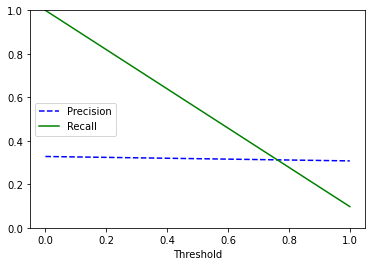


For learning rate of 0.070000
Training accuracy is 0.627
Testing accuracy is 0.632
Prediction accuracy is 0.63200


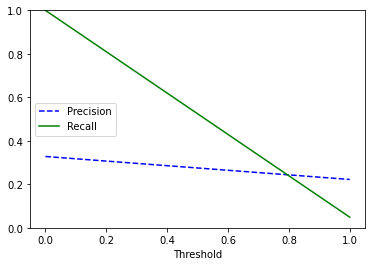


For learning rate of 0.100000
Training accuracy is 0.653
Testing accuracy is 0.584
Prediction accuracy is 0.58400


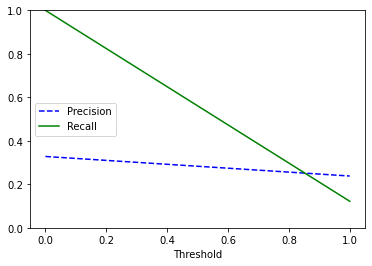


For learning rate of 0.250000
Training accuracy is 0.720
Testing accuracy is 0.536
Prediction accuracy is 0.53600


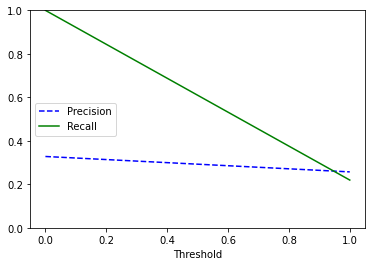


For learning rate of 0.500000
Training accuracy is 0.773
Testing accuracy is 0.544
Prediction accuracy is 0.54400


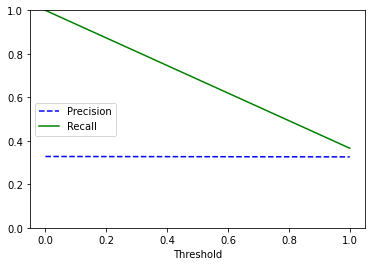


For learning rate of 0.750000
Training accuracy is 0.784
Testing accuracy is 0.568
Prediction accuracy is 0.56800


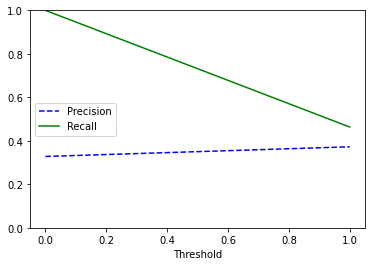


For learning rate of 1.000000
Training accuracy is 0.835
Testing accuracy is 0.560
Prediction accuracy is 0.56000


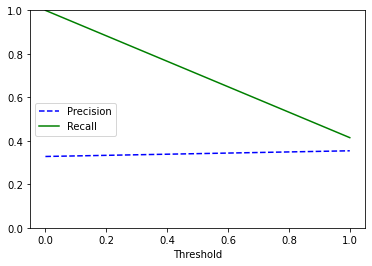

In [457]:
# Choose a learning rate and create the classifier
for rate in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=rate,
                                     max_features=5,
                                     max_depth=3,
                                     random_state=0
    )

# Fit the model
    clf.fit(X_train_scaled, y_train.ravel()) # dont forget to flatten the y array
    predictions = clf.predict(X_test_scaled)
    
    #y_scores = cross_val_predict(clf, X_train_scaled, y_train.ravel(), cv=3)
    precisions, recalls, thresholds = precision_recall_curve(y_test, predictions)
    
    print("For learning rate of {0:.6f}".format(rate))
    # Make Prediction
    print("Training accuracy is {0:.3f}".format(clf.score(X_train_scaled, y_train.ravel())))
    print("Testing accuracy is {0:.3f}". format(clf.score(X_test_scaled, y_test.ravel())))
    print("Prediction accuracy is {0:.5f}".format(accuracy_score(y_test, predictions)))
    plot_precision_recall(precisions, recalls, thresholds)
    
    print()
    

# Accuracy score is generally not a good performance measure for classifiers, especially when you are dealing with 
# skewed datasets (when some classes are much more frequent than others). Focus on ROC and Precision/Recall tradeoff 
# TODO: import 2 helper functions to plot precision/recall and ROC/AUC, run plots for every learning rate


#y_scores = cross_val_predict(clf, X_train_scaled, y_train, cv=3)
#precisions, recalls, thresholds = precision_recall_curve(y_train, clf_y_scores)

#from sklearn.metrics import roc_curve
#false_positive, true_negative, thresholds = roc_curve(y_train, clf_y_scores)


### Validation Curve: accuracy and regularization 

/Users/dmitrymikhaylov/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass param_name=learning_rate, param_range=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


ValueError: x and y must have same first dimension, but have shapes (1,) and (10,)

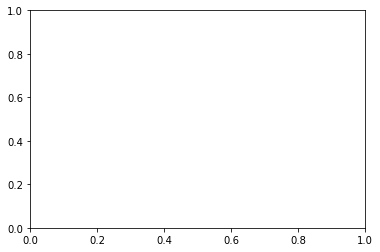

In [458]:
from sklearn.model_selection import validation_curve
learning_rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

train_score, val_score = validation_curve(GradientBoostingClassifier(n_estimators=10), 
                                          X, y.ravel(),
                                          'learning_rate', 
                                          learning_rate, 
                                          cv=5)

plt.plot(degree, np.median(train_score, 1), color='blue', label='training score') 
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score') 
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('learmimg_rate') 
plt.ylabel('accuracy_score');

### Grid Search

In [365]:
from sklearn.model_selection import GridSearchCV

param_grid = {'learning_rate': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], 
             "n_estimators" : [10, 20, 30, 40, 50],
              "max_features": [2, 3, 4, 5, 6, 7, 8, 9],
              "max_depth" : [2, 3, 4, 5]
             
             
             } 

grid = GridSearchCV(GradientBoostingClassifier(), param_grid, cv=7)

grid.fit(X, y.ravel());

grid.best_params_

{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}

### The best model

In [459]:
# Calculating the accuracy score
clf_best = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.2,
                                     max_features=2,
                                     max_depth=2,
                                     random_state=0
    )
clf_best.fit(X_train_scaled, y_train.ravel())
#{'learning_rate': 0.2, 'max_depth': 2, 'max_features': 2, 'n_estimators': 20}
predictions = clf_best.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test.ravel()}).head(5)

,Prediction,Actual
0,0,1
1,0,0
2,0,1
3,0,0
4,0,0


In [460]:
# Important: double check the best model with cross validation 
from sklearn.model_selection import cross_val_score 
scores = cross_val_score(clf_best, X, y.ravel(), cv=10)
scores.mean()

0.586

In [461]:
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.592


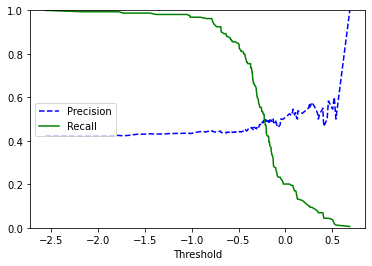

In [468]:
y_scores = cross_val_predict(clf_best, X_train_scaled, y_train.ravel(), cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plot_precision_recall(precisions, recalls, thresholds)
plt.show()

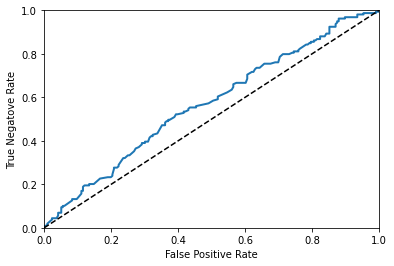

In [469]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()

In [411]:
# Generate the confusion matrix
pd.DataFrame(confusion_matrix(y_test, predictions), index=["Pred 0", "Pred 1"], columns=["Actual 1", "Actual 0"])

,Actual 1,Actual 0
Pred 0,66,18
Pred 1,33,8


In [412]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

-0.022167059799599678

In [413]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.67      0.79      0.72        84
           1       0.31      0.20      0.24        41

    accuracy                           0.59       125
   macro avg       0.49      0.49      0.48       125
weighted avg       0.55      0.59      0.56       125



#### Checking learning_rate = 0.75 results

In [415]:
# Calculating the accuracy score
clf_benchmark = GradientBoostingClassifier(n_estimators=20,
                                     learning_rate=0.75,
                                     max_features=5,
                                     max_depth=3,
                                     random_state=0
    )
clf_benchmark.fit(X_train_scaled, y_train.ravel())

# Make Prediction
predictions = clf_benchmark.predict(X_test_scaled)
# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
print(f"Accuracy Score : {acc_score}")

Accuracy Score : 0.568


In [416]:
# Generate the confusion matrix
#confusion_matrix = confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, predictions)
confusion_matrix_df = pd.DataFrame(
    cm, 
    columns=['Actual 0', 'Actual 1'], index=['Pred 0', 'Pred 1'])
display(confusion_matrix_df)

,Actual 0,Actual 1
Pred 0,52,32
Pred 1,22,19


In [417]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions)

0.07877453001099935

In [418]:
# Generate classification report
print("Classification Report")
print(classification_report(y_test, predictions))

Classification Report
              precision    recall  f1-score   support

           0       0.70      0.62      0.66        84
           1       0.37      0.46      0.41        41

    accuracy                           0.57       125
   macro avg       0.54      0.54      0.54       125
weighted avg       0.59      0.57      0.58       125



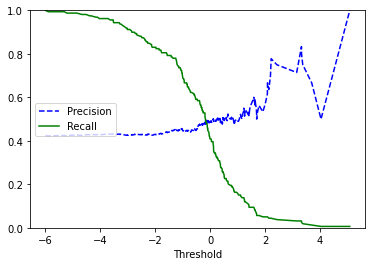

In [471]:
y_scores = cross_val_predict(clf_benchmark, X_train_scaled, y_train.ravel(), cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

plot_precision_recall(precisions, recalls, thresholds)
plt.show()

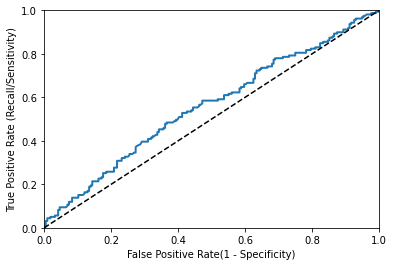

In [472]:
fpr, tpr, thresholds = roc_curve(y_train, y_scores)
plot_roc_curve(fpr, tpr)
plt.show()